Library

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

Import Data

In [15]:
data = pd.read_csv("Gold Futures Historical Data (23.01.24-22.11.24).csv")
print(len(data))
data.head()

217


,Date,Price,Open,High,Low,Vol.,Change %
0,11/22/2024,"2,699.70","2,671.20","2,701.60","2,670.85",NaN,0.93%
1,11/21/2024,"2,674.90","2,653.50","2,676.50","2,651.60",186.30K,0.87%
2,11/20/2024,"2,651.70","2,635.80","2,659.00","2,621.90",182.01K,0.79%
3,11/19/2024,"2,631.00","2,616.30","2,643.40","2,614.20",202.24K,0.63%
4,11/18/2024,"2,614.60","2,571.50","2,619.50","2,568.50",195.29K,1.73%


Check and Cleaning Data

In [16]:
data.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [17]:
print(data.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        3
Change %    0
dtype: int64


In [18]:
data['Vol.'] = data['Vol.'].str.replace('K', '').astype(float)
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/22/2024,"2,699.70","2,671.20","2,701.60","2,670.85",NaN,0.93%
1,11/21/2024,"2,674.90","2,653.50","2,676.50","2,651.60",186.30,0.87%
2,11/20/2024,"2,651.70","2,635.80","2,659.00","2,621.90",182.01,0.79%
3,11/19/2024,"2,631.00","2,616.30","2,643.40","2,614.20",202.24,0.63%
4,11/18/2024,"2,614.60","2,571.50","2,619.50","2,568.50",195.29,1.73%


In [19]:
data['Vol.'] = data['Vol.'].fillna(data['Vol.'].mean())
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/22/2024,"2,699.70","2,671.20","2,701.60","2,670.85",93.092056,0.93%
1,11/21/2024,"2,674.90","2,653.50","2,676.50","2,651.60",186.300000,0.87%
2,11/20/2024,"2,651.70","2,635.80","2,659.00","2,621.90",182.010000,0.79%
3,11/19/2024,"2,631.00","2,616.30","2,643.40","2,614.20",202.240000,0.63%
4,11/18/2024,"2,614.60","2,571.50","2,619.50","2,568.50",195.290000,1.73%


In [20]:
print(data.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [21]:
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/22/2024,"2,699.70","2,671.20","2,701.60","2,670.85",93.092056,0.93
1,11/21/2024,"2,674.90","2,653.50","2,676.50","2,651.60",186.300000,0.87
2,11/20/2024,"2,651.70","2,635.80","2,659.00","2,621.90",182.010000,0.79
3,11/19/2024,"2,631.00","2,616.30","2,643.40","2,614.20",202.240000,0.63
4,11/18/2024,"2,614.60","2,571.50","2,619.50","2,568.50",195.290000,1.73


In [22]:
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-11-22,"2,699.70","2,671.20","2,701.60","2,670.85",93.092056,0.93
1,2024-11-21,"2,674.90","2,653.50","2,676.50","2,651.60",186.300000,0.87
2,2024-11-20,"2,651.70","2,635.80","2,659.00","2,621.90",182.010000,0.79
3,2024-11-19,"2,631.00","2,616.30","2,643.40","2,614.20",202.240000,0.63
4,2024-11-18,"2,614.60","2,571.50","2,619.50","2,568.50",195.290000,1.73


In [23]:
data["Price"] = data["Price"].str.replace(',', '').astype(float)
data["Open"] = data["Open"].str.replace(',', '').astype(float)
data["High"] = data["High"].str.replace(',', '').astype(float)
data["Low"] = data["Low"].str.replace(',', '').astype(float)
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-11-22,2699.7,2671.2,2701.6,2670.85,93.092056,0.93
1,2024-11-21,2674.9,2653.5,2676.5,2651.60,186.300000,0.87
2,2024-11-20,2651.7,2635.8,2659.0,2621.90,182.010000,0.79
3,2024-11-19,2631.0,2616.3,2643.4,2614.20,202.240000,0.63
4,2024-11-18,2614.6,2571.5,2619.5,2568.50,195.290000,1.73


In [24]:
data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object

In [25]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,217,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,2024-06-23 06:24:53.087557632,2387.950230,2386.220968,2403.782028,2370.633180,93.092056,0.137465
min,2024-01-23 00:00:00,1994.700000,1994.900000,1998.700000,1987.200000,0.220000,-2.860000
25%,2024-04-09 00:00:00,2305.900000,2306.300000,2325.200000,2291.700000,0.790000,-0.320000
50%,2024-06-24 00:00:00,2375.000000,2371.000000,2394.300000,2356.000000,4.910000,0.190000
75%,2024-09-09 00:00:00,2519.700000,2522.000000,2536.100000,2505.700000,196.670000,0.780000
max,2024-11-22 00:00:00,2800.800000,2799.100000,2801.800000,2782.400000,391.750000,2.000000
std,NaN,207.300823,207.644963,208.947003,205.423414,114.746935,0.929762


Plot

Correlation

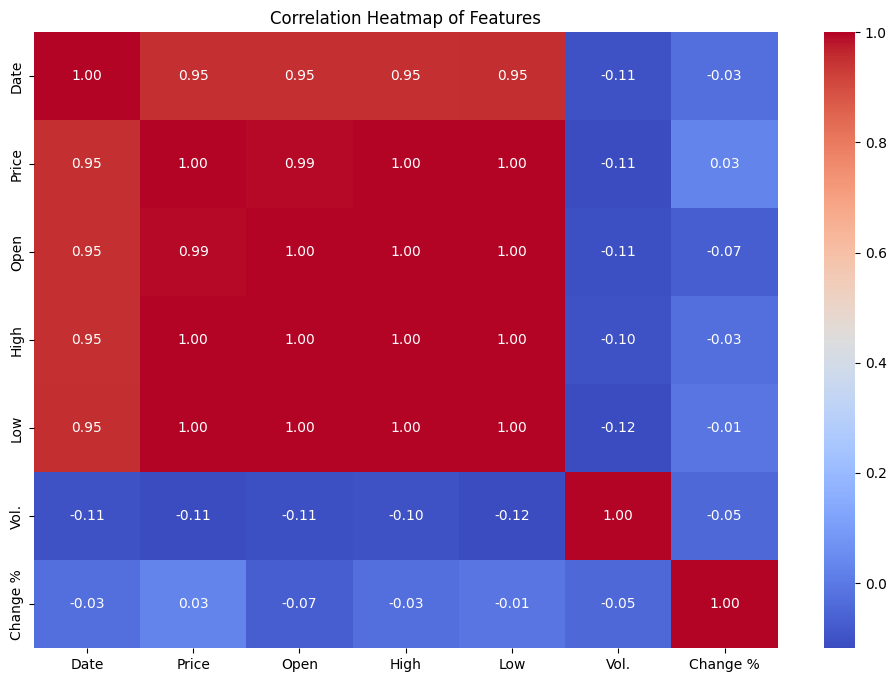

In [26]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

Linear Relationship

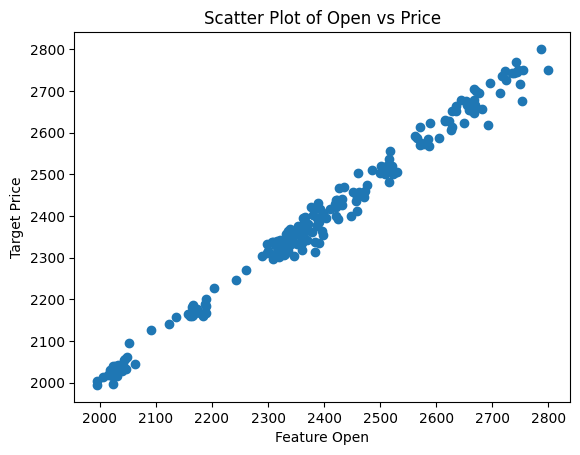

In [27]:
plt.scatter(data['Open'], data['Price'])
plt.xlabel('Feature Open')
plt.ylabel('Target Price')
plt.title('Scatter Plot of Open vs Price')
plt.show()

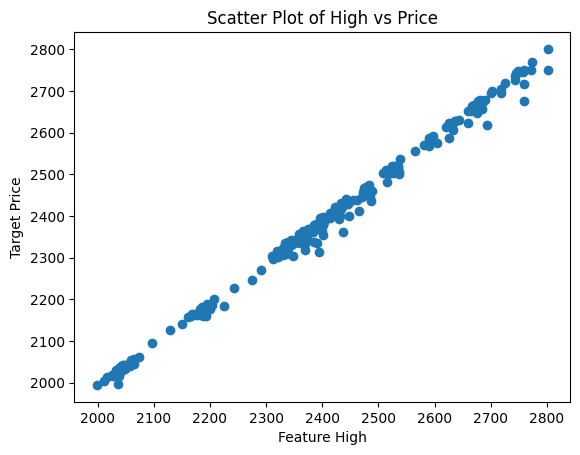

In [88]:
plt.scatter(data['High'], data['Price'])
plt.xlabel('Feature High')
plt.ylabel('Target Price')
plt.title('Scatter Plot of High vs Price')
plt.show()

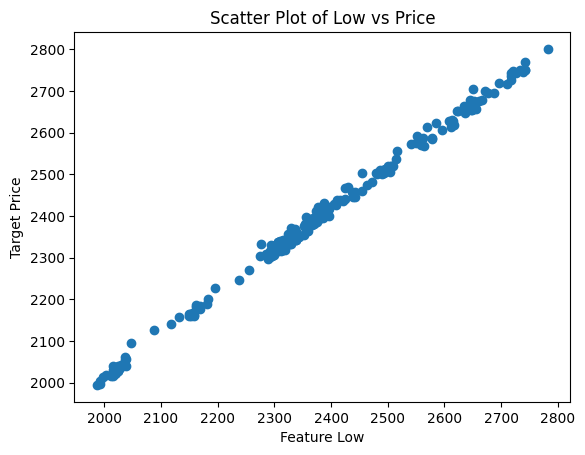

In [89]:
plt.scatter(data['Low'], data['Price'])
plt.xlabel('Feature Low')
plt.ylabel('Target Price')
plt.title('Scatter Plot of Low vs Price')
plt.show()

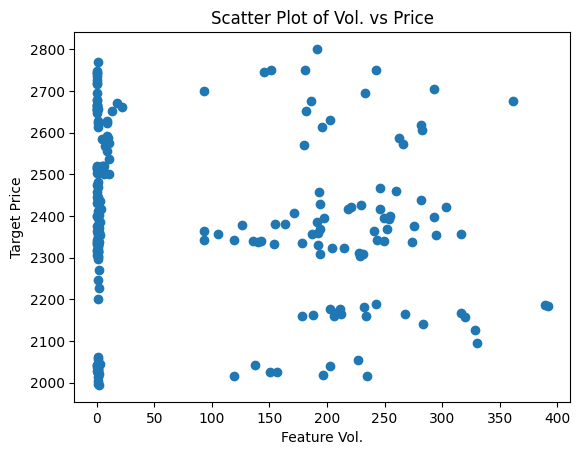

In [82]:
plt.scatter(data['Vol.'], data['Price'])
plt.xlabel('Feature Vol.')
plt.ylabel('Target Price')
plt.title('Scatter Plot of Vol. vs Price')
plt.show()

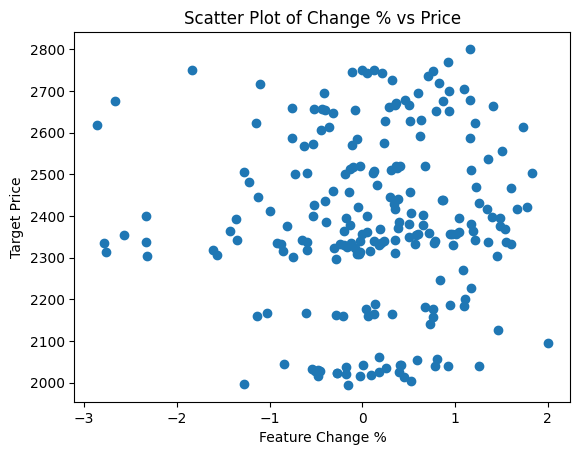

In [75]:
plt.scatter(data['Change %'], data['Price'])
plt.xlabel('Feature Change %')
plt.ylabel('Target Price')
plt.title('Scatter Plot of Change % vs Price')
plt.show()

Multicollinearity (VIF)

In [92]:
X_variable = data.drop(['Price', "Date", 'High', 'Low', 'Vol.', "Change %"], axis = 1)  
X_variable = add_constant(X_variable)  
vif_data = pd.DataFrame()
vif_data["Variable"] = X_variable.columns
vif_data["VIF"] = [variance_inflation_factor(X_variable.values, i) for i in range(X_variable.shape[1])]
print(vif_data)

  Variable         VIF
0    const  133.673595
1     Open    1.000000


Homoscedasticity (Residual plot)

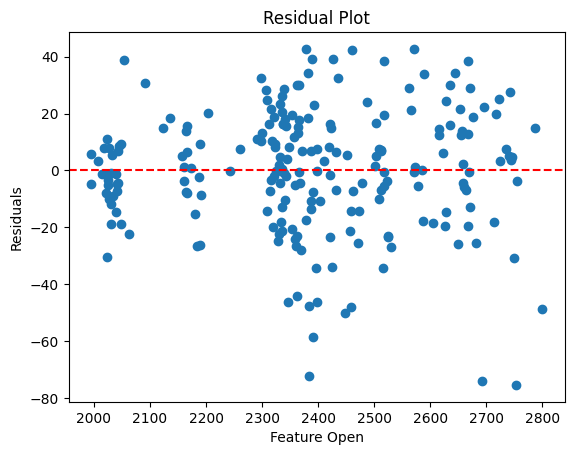

In [93]:
X = data[['Open']]
X = sm.add_constant(X)  
y = data['Price']

model = sm.OLS(y, X).fit()  
residuals = model.resid

plt.scatter(data['Open'], residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')  
plt.xlabel('Feature Open')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Independence of Errors (Durbin-Watson Test) 1.5-2.5

In [95]:
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 2.0694356188797283


Normality of Errors (Q-Q Plot)

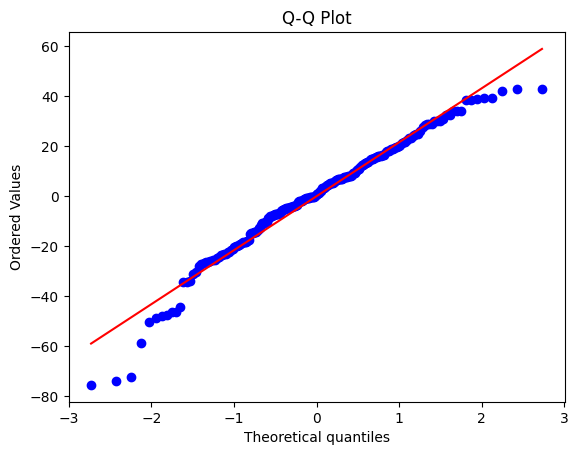

In [96]:
stats.probplot(residuals, dist = "norm", plot = plt)
plt.title('Q-Q Plot')
plt.show()

Outliers From Z-scores

In [97]:
z_scores = stats.zscore(data[['Open']])
print(z_scores)
outliers = abs(z_scores) > 3
print(outliers.sum())

         Open
0    1.375607
1    1.290169
2    1.204730
3    1.110602
4    0.894351
..        ...
212 -1.746527
213 -1.762939
214 -1.792867
215 -1.716117
216 -1.752320

[217 rows x 1 columns]
Open    0
dtype: int64


Select Variable and Split Data

In [98]:
X = data['Open']
y = data["Price"]

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.935e+04
Date:                Fri, 02 May 2025   Prob (F-statistic):          1.40e-212
Time:                        16:34:01   Log-Likelihood:                -975.51
No. Observations:                 217   AIC:                             1955.
Df Residuals:                     215   BIC:                             1962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8114     17.097      1.100      0.2

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Fit Model

In [100]:
model = LinearRegression()

In [101]:
model.fit(X_train, y_train)

LinearRegression()

Prediction and Evaluate

In [102]:
y_pred = model.predict(X_test)

In [103]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 15.841906960160342
MSE: 468.3536176831867
RMSE: 21.641479101096273
R²: 0.9886676066606468


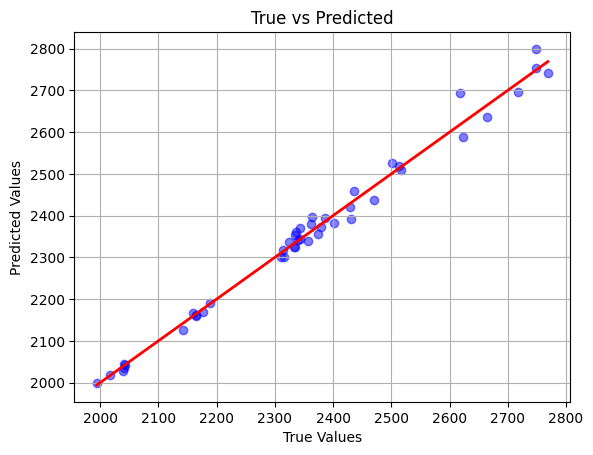

In [104]:
plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth = 2) 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted')
plt.grid(True)
plt.show()